In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

Definimos la ruta donde se encuentran los datos de entrenamiento y de prueba

In [55]:
path = ("C:/kaggle/pets/PetImages")

In [56]:
path_cat = path + "/Cat"
path_dog = path + "/Dog"

In [57]:
os.listdir(path)

['Cat', 'Dog']

En la carpeta "Cat" se encuentran las imagenes de gatos y en la carpeta "Dog" se encuentran las imagenes de perros

In [58]:
os.listdir(path_cat)

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg'

Cada imagen tiene diferente tamaño, por lo que debemos redimensionarlas a un tamaño fijo para poder trabajar con ellas, vamos a redimensionarlas a un tamaño de 255x255

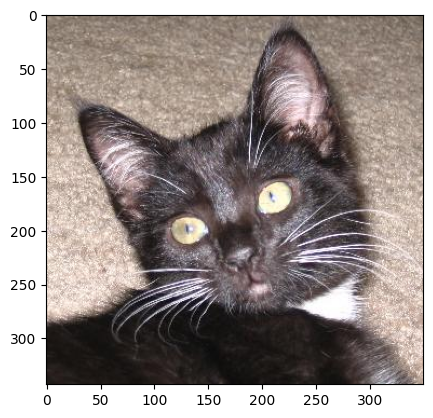

In [63]:
img = plt.imread(path_cat + "/102.jpg")
plt.imshow(img)
plt.show()

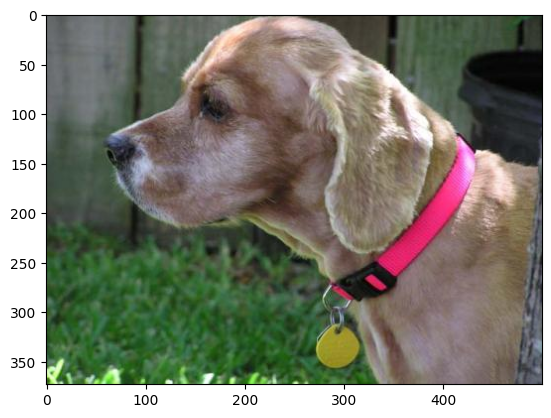

In [64]:
img = plt.imread(path_dog + "/102.jpg")
plt.imshow(img)
plt.show()

Bien, la idea es contruir nuestro prerceptron desde 0 de manera que podamos clasificar las imagenes en dos clases: Gatos y Perros. Para ello vamos a seguir los siguientes pasos:

In [95]:
# Cargamos los datos

def load_dataset():
    X = []
    y = []
    for i in range(12500):
        try:
            img = Image.open(os.path.join(path_cat, f"{i}.jpg")).resize((255, 255))
            img = img.convert('RGB')  # Asegurarse de que la imagen tenga 3 canales
            X.append(np.array(img))
            y.append(1)
        except Exception as e:
            print(f"Error loading image {i} from Cat: {e}")
    for i in range(12500):
        try:
            img = Image.open(os.path.join(path_dog, f"{i}.jpg")).resize((255, 255))
            img = img.convert('RGB')  # Asegurarse de que la imagen tenga 3 canales
            X.append(np.array(img))
            y.append(0)
        except Exception as e:
            print(f"Error loading image {i} from Dog: {e}")
    return np.array(X), np.array(y)

In [96]:
X, y = load_dataset()

Error loading image 666 from Cat: cannot identify image file 'C:\\kaggle\\pets\\PetImages\\Cat\\666.jpg'
Error loading image 11702 from Dog: cannot identify image file 'C:\\kaggle\\pets\\PetImages\\Dog\\11702.jpg'


In [97]:
X.shape, y.shape

((24998, 255, 255, 3), (24998,))

In [98]:
y

array([1, 1, 1, ..., 0, 0, 0])

Clase:  0


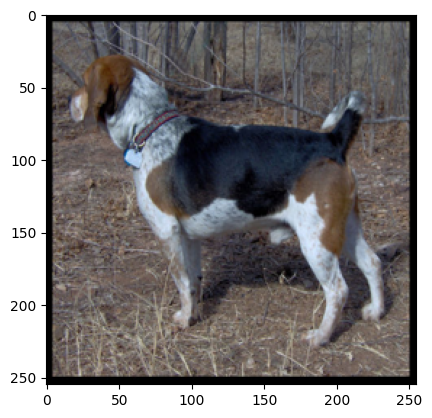

In [99]:
# Probamos algunos datos
index = 19000
plt.imshow(X[index])
print("Clase: ", y[index])

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y, shuffle=True)

In [112]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19998, 255, 255, 3), (19998,), (5000, 255, 255, 3), (5000,))

Clase:  0


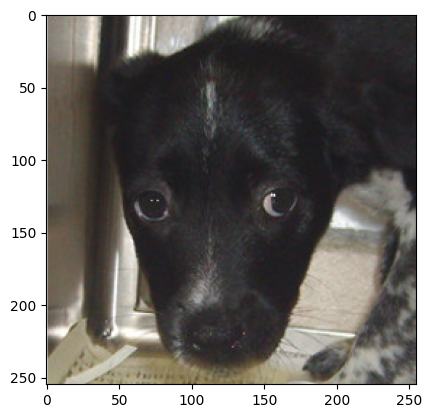

In [115]:
index = 181
plt.imshow(X_train[index])
print("Clase: ", y_train[index])

In [116]:
m_train = len(y_train)
m_test = len(y_test)
num_p_x = len(X_train[0])

print("Numero de ejemplos de entrenamiento: ", m_train)
print("Numero de ejemplos de prueba: ", m_test)
print("Numero de pixeles: ", num_p_x)
print("Tamaño de cada imagen: ", X_train[0].shape)
print("Tamaño de datos de entrenamiento: ", X_train.shape) 
print("Tamaño de datos de prueba: ", X_test.shape)

Numero de ejemplos de entrenamiento:  19998
Numero de ejemplos de prueba:  5000
Numero de pixeles:  255
Tamaño de cada imagen:  (255, 255, 3)
Tamaño de datos de entrenamiento:  (19998, 255, 255, 3)
Tamaño de datos de prueba:  (5000, 255, 255, 3)


In [117]:
train_set_X_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_X_flatten = X_test.reshape(X_test.shape[0], -1).T

print("Tamaño de datos de entrenamiento: ", train_set_X_flatten.shape)
print("Tamaño de datos de prueba: ", test_set_X_flatten.shape)

Tamaño de datos de entrenamiento:  (195075, 19998)
Tamaño de datos de prueba:  (195075, 5000)


In [118]:
# Estandarizamos los datos
train_set_X = train_set_X_flatten/255.
test_set_X = test_set_X_flatten/255.

# Forward And propagation

In [119]:
# definimos la funcion sigmoid
def sigmoid(x):
    '''
    :param x: numpy array n x m 
    :return: numpy array n x m
    '''
    return 1/(1 + np.exp(-x))

In [120]:
def initialize_parameters(dim):
    '''
    :param dim: tamaño de los parametros
    :return: diccionario con los parametros inicializados
    '''
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [141]:
def propagation(w, b, X, Y):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :param Y: numpy array n x 1
    :return: 
    grad: diccionario de los gradientes de los pesos y el bias
    cost: costo de la regresion logistica
    '''
    m = X.shape[1]
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    # cost = -1/m * np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A))
    
    epsilon = 1e-8
    cost = -1/m * np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
    
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    grad = {"dw": dw, "db": db}
    
    return grad, cost

In [136]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :param Y: numpy array n x 1
    :param num_iterations: numero de iteraciones
    :param learning_rate: tasa de aprendizaje
    :return: 
    params: diccionario de los parametros
    grads: diccionario de los gradientes
    costs: lista de los costos
    '''
    costs = []
    for i in range(num_iterations):
        grad, cost = propagation(w, b, X, Y)
        dw = grad["dw"]
        db = grad["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            print("Costo despues de iteracion %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

In [137]:
def predict (w, b, X):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :return: numpy array n x 1
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_prediction

In [138]:
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate):
    '''
    :param X_train: numpy array n x m
    :param y_train: numpy array n x 1
    :param X_test: numpy array n x m
    :param y_test: numpy array n x 1
    :param num_iterations: numero de iteraciones
    :param learning_rate: tasa de aprendizaje
    :return: 
    d: diccionario de los parametros
    '''
    w, b = initialize_parameters(X_train.shape[0])
    
    params, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate)
    w = params["w"]
    b = params["b"]
    
    y_prediction_test = predict(w, b, X_test)
    y_prediction_train = predict(w, b, X_train)
    
    print("Precision de entrenamiento: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Precision de prueba: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    d = {"costs": costs, "y_prediction_test": y_prediction_test, "y_prediction_train": y_prediction_train, "w": w, "b": b, "learning_rate": learning_rate, "num_iterations": num_iterations}
    
    return d

In [140]:
logistic_model_regresion = model(train_set_X, y_train, test_set_X, y_test, num_iterations = 2000, learning_rate = 0.005)

Costo despues de iteracion 0: 0.693147


KeyboardInterrupt: 

y = 1, prediccion = 1


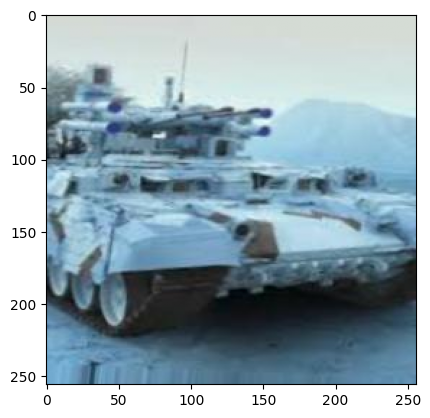

In [28]:
# Ejemplo de prediccion
index = 4
plt.imshow(test_set_X[:,index].reshape((256, 256, 3)))
print ("y = " + str(y_test[index]) + ", prediccion = " + str(int(logistic_model_regresion["y_prediction_test"][0,index])))

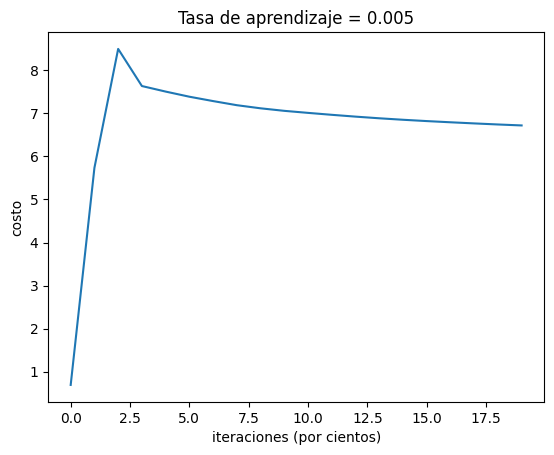

In [29]:
# Grafica de la funcion de costo
costs = np.squeeze(logistic_model_regresion['costs'])
plt.plot(costs)
plt.ylabel('costo')
plt.xlabel('iteraciones (por cientos)')
plt.title("Tasa de aprendizaje = " + str(logistic_model_regresion["learning_rate"]))
plt.show()

prediccion = 1.0


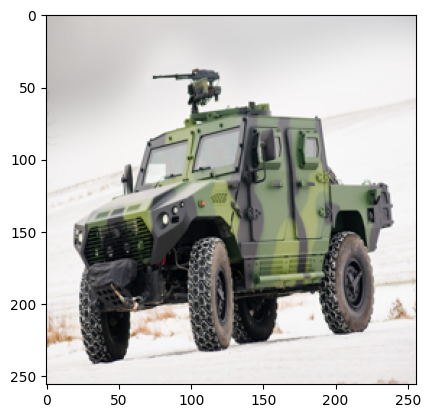

In [42]:
# Prueba con una imagen militar
path_my_image = "imagenes/carro_militar.jpg"
image = np.array(Image.open(path_my_image).resize((256, 256)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 256 * 256 * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

prediccion = 0.0


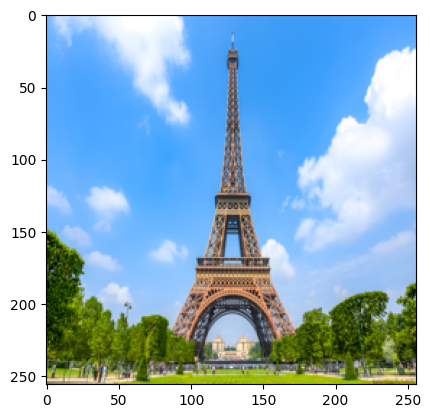

In [38]:
# Prueba con una imagen que no es militar
path_my_image = "imagenes/torre_eiffel.jpg"
image = np.array(Image.open(path_my_image).resize((256, 256)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 256 * 256 * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

In [43]:
# Validaciones
path_valdidacion = path + "/validation"

def load_dataset_validation():
    '''
    :return: numpy array n x m, numpy array n x 1
    '''
    X = []
    y = []
    for i in range(1000):
        try:
            img = plt.imread(path_valdidacion + "/millitary/millitary_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(1)
        except:
            pass
    for i in range(1000):
        try:
            img = plt.imread(path_valdidacion + "/other/other_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(0)
        except:
            pass    
    return np.array(X), np.array(y)

X_validation, y_validation = load_dataset_validation()

In [44]:
X_validation.shape, y_validation.shape

((354, 256, 256, 3), (354,))

In [45]:
train_set_X_flatten = X_validation.reshape(X_validation.shape[0], -1).T
train_set_X = train_set_X_flatten/255.

In [46]:
y_prediction_validation = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], train_set_X)

In [47]:
print("Precision de validacion: {} %".format(100 - np.mean(np.abs(y_prediction_validation - y_validation)) * 100))

Precision de validacion: 57.6271186440678 %


In [50]:
# Guardamos el modelo
import pickle

with open("logistic_model_regresion.pkl", "wb") as f:
    pickle.dump(logistic_model_regresion, f)